In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

## Сгенерировать данные (датасет) случайным образом:

```text
date_in     | customer_count | country_code | status
----------------------------------------------------
2024-01-01  | 901            | RU           | 1
2024-01-02  | 901            | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
2024-01-01  | 901            | US           | 1
2024-01-02  | 1024           | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
```

для примера будем создавать датасет для диапазона 2024-01-01-2024-02-28 x 4

In [2]:
from numpy import random

def create_dataset(number_for_date=1):
    result = []
    country_codes = ['RU', 'Ru', 'US', 'us', 'KZ' , "IT", 'it', 'CA', 'Ca']
    status = [1,2,3]
    for i in range(number_for_date):
        dates_rng = pd.date_range(start='2023-01-01', end='2024-04-05', freq='D')
        rand_customer_count = random.randint(low=0, high=1200, size=len(dates_rng))
        rand_status = [status[random.randint(low=0, high=len(status))] for i in range(len(dates_rng))]
        rand_country_code = [country_codes[random.randint(low=0, high=len(country_codes))] for i in range(len(dates_rng))]
        result.extend(zip(dates_rng, rand_customer_count, rand_country_code, rand_status))
    return result

In [7]:
dataset = create_dataset(4)
df = pd.DataFrame(data=dataset, columns=['date_in', 'customer_count', 'country_code', 'status'])
df.head(20)

,date_in,customer_count,country_code,status
0,2023-01-01,569,US,1
1,2023-01-02,407,RU,2
2,2023-01-03,392,IT,3
3,2023-01-04,1148,IT,3
4,2023-01-05,140,Ru,2
5,2023-01-06,102,RU,2
6,2023-01-07,820,KZ,2
7,2023-01-08,281,CA,3
8,2023-01-09,993,Ca,2
9,2023-01-10,960,KZ,3


In [11]:
df.shape

(1844, 4)

In [9]:
df.to_excel('company_stats.xlsx', index=False)

In [12]:
df = pd.read_excel('company_stats.xlsx', 0, index_col='date_in')
df.shape

(1844, 3)

In [13]:
df.head(20)

,customer_count,country_code,status
date_in,,,
2023-01-01,569,US,1
2023-01-02,407,RU,2
2023-01-03,392,IT,3
2023-01-04,1148,IT,3
2023-01-05,140,Ru,2
2023-01-06,102,RU,2
2023-01-07,820,KZ,2
2023-01-08,281,CA,3
2023-01-09,993,Ca,2


In [14]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05'],
              dtype='datetime64[ns]', name='date_in', length=1844, freq=None)

In [15]:
df.dtypes

customer_count     int64
country_code      object
status             int64
dtype: object

In [16]:
df['country_code'] = df.country_code.apply(lambda x: x.upper())
df.head(20)

,customer_count,country_code,status
date_in,,,
2023-01-01,569,US,1
2023-01-02,407,RU,2
2023-01-03,392,IT,3
2023-01-04,1148,IT,3
2023-01-05,140,RU,2
2023-01-06,102,RU,2
2023-01-07,820,KZ,2
2023-01-08,281,CA,3
2023-01-09,993,CA,2


In [18]:
filter_country_ru = df['country_code']=='RU'
df['country_code'][filter_country_ru] = 'IT'

,customer_count,country_code,status
date_in,,,
2023-01-02,407,RU,2
2023-01-05,140,RU,2
2023-01-06,102,RU,2
2023-01-12,1152,RU,2
2023-01-19,330,RU,3
...,...,...,...
2024-03-22,92,RU,1
2024-03-30,1008,RU,3
2024-03-31,407,RU,3


In [19]:
df['country_code'].unique()

array(['US', 'RU', 'IT', 'KZ', 'CA'], dtype=object)

## Построить график кол-ва клиентов

## Сгруппировать данные по странам, датам. Удалить колонку статус. Отобразить графики кол-ва пользователей по странам. Отобразить только за 2024-й год.

## Найти аномалии
По месяцам:

- Lower = `x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25))`
- Upper: `x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25))`

## Найти максимум по годам

## Добавить колонку Годовая цель. Отобразить на одном графике.

## Показать как менялось в процентах по годам максимальное значение (yr_pct_change)

<Axes: xlabel='date_in'>

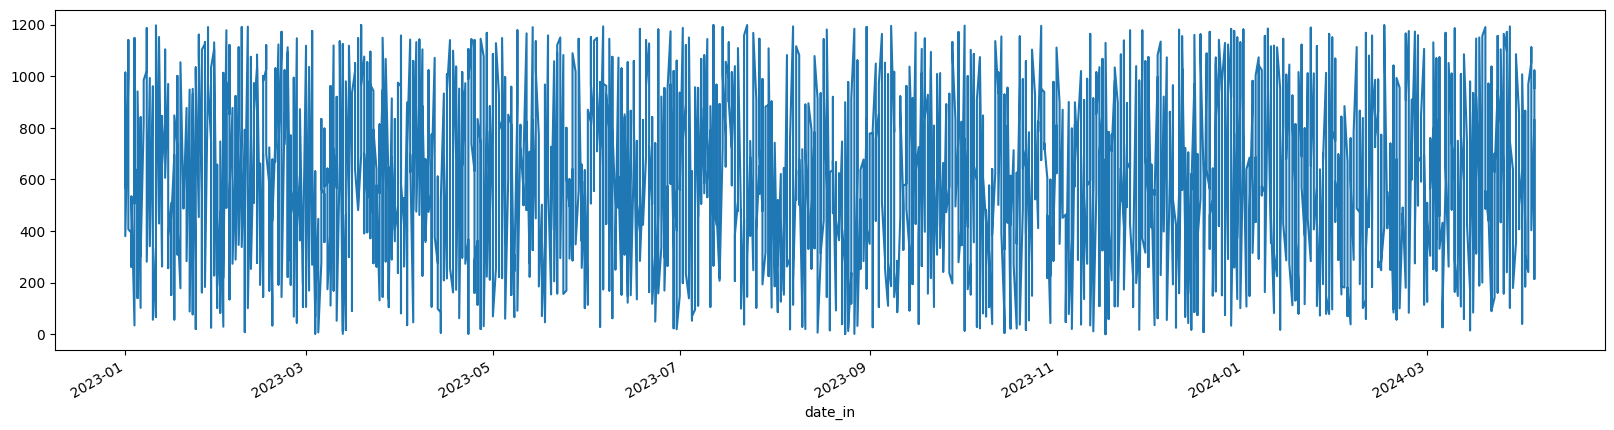

In [21]:
df['customer_count'].plot(figsize=(20,5))

In [22]:
daily_data = df.reset_index().groupby(['country_code', 'date_in']).sum()
daily_data

customer_count  status
country_code date_in                           
CA           2023-01-01             468       2
             2023-01-03             535       1
             2023-01-04             975       4
             2023-01-05             190       1
             2023-01-07            1841       3
...                                 ...     ...
US           2024-03-28             103       1
             2024-04-02             415       2
             2024-04-03             968       3
             2024-04-04            2102       6
             2024-04-05            1022       3

[1353 rows x 2 columns]

In [23]:
del daily_data['status']

In [24]:
daily_data.index

MultiIndex([('CA', '2023-01-01'),
            ('CA', '2023-01-03'),
            ('CA', '2023-01-04'),
            ('CA', '2023-01-05'),
            ('CA', '2023-01-07'),
            ('CA', '2023-01-08'),
            ('CA', '2023-01-09'),
            ('CA', '2023-01-11'),
            ('CA', '2023-01-12'),
            ('CA', '2023-01-13'),
            ...
            ('US', '2024-03-21'),
            ('US', '2024-03-22'),
            ('US', '2024-03-24'),
            ('US', '2024-03-25'),
            ('US', '2024-03-27'),
            ('US', '2024-03-28'),
            ('US', '2024-04-02'),
            ('US', '2024-04-03'),
            ('US', '2024-04-04'),
            ('US', '2024-04-05')],
           names=['country_code', 'date_in'], length=1353)

In [25]:
daily_data.index.dtypes

country_code            object
date_in         datetime64[ns]
dtype: object

In [26]:
daily_data.index.unique(level = 'country_code')

Index(['CA', 'IT', 'KZ', 'RU', 'US'], dtype='object', name='country_code')

In [27]:
daily_data.index.levels[0]

Index(['CA', 'IT', 'KZ', 'RU', 'US'], dtype='object', name='country_code')